In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Id primary key

CreationDate when the link was created

PostId id of source post

RelatedPostId id of target/related post

LinkTypeId type of link

1 = Linked (PostId contains a link to RelatedPostId)

3 = Duplicate (PostId is a duplicate of RelatedPostId)


In [4]:
data= pd.read_csv('/content/drive/MyDrive/Machine learning/LHC dataset/dataset/posts_short.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
data

,Unnamed: 0,id,post_type_id,accepted_answer_id,parent_id,creation_date,score,view_count,owner_user_id,tags,answer_count,comment_count,favorite_count,community_owned_date
0,0,4,1,7,-999,2008-07-31T21:42:52.667,573,37080,8,<c#><floating-point><type-conversion><double><...,13,1,41,2012-10-31T16:42:47.213
1,1,6,1,31,-999,2008-07-31T22:08:08.620,256,16306,9,<html><css><css3><internet-explorer-7>,5,0,10,NaN
2,2,9,1,1404,-999,2008-07-31T23:40:59.743,1743,480476,1,<c#><.net><datetime>,64,7,399,2011-08-16T19:40:43.080
3,3,11,1,1248,-999,2008-07-31T23:55:37.967,1348,136033,1,<c#><datetime><time><datediff><relative-time-s...,35,3,529,2009-09-04T13:15:59.820
4,4,13,1,-999,-999,2008-08-01T00:42:38.903,539,157009,9,<javascript><html><browser><timezone><timezone...,25,6,137,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676199,676199,52133457,1,-999,-999,2018-09-02T02:10:04.210,0,14,4101319,<python><import>,0,0,0,NaN
676200,676200,52133674,1,-999,-999,2018-09-02T03:08:51.103,-3,16,9815281,<java><firebase><android-studio>,0,2,0,NaN
676201,676201,52133700,1,-999,-999,2018-09-02T03:15:42.997,0,23,4044009,<c>,0,1,0,NaN
676202,676202,52133880,1,-999,-999,2018-09-02T04:04:31.570,0,15,10271692,<angularjs><node.js><ajax>,1,1,0,NaN


1. Determine the Number of Tags Per Question


In [6]:
tag_short=data.values[:,9]
tagshort2=list()
tags=list()
for i in range(20):
  x=tag_short[i].split("<")
  s="".join(x)
  x= s.split(">")
  x.pop()
  tagshort2.append(x)
  tags.append(len(x))
  print(len(x))
  print(x)

5
['c#', 'floating-point', 'type-conversion', 'double', 'decimal']
4
['html', 'css', 'css3', 'internet-explorer-7']
3
['c#', '.net', 'datetime']
5
['c#', 'datetime', 'time', 'datediff', 'relative-time-span']
5
['javascript', 'html', 'browser', 'timezone', 'timezoneoffset']
2
['.net', 'math']
4
['mysql', 'database', 'binary-data', 'data-storage']
3
['mysql', 'database', 'triggers']
4
['sql', 'sql-server', 'datatable', 'rdbms']
4
['php', 'plugins', 'architecture', 'hook']
4
['html', 'form-submit', 'html-form', 'submit-button']
3
['c#', 'linq', '.net-3.5']
5
['linux', 'winapi', 'visual-c++', 'unix', 'timer']
4
['svn', 'tortoisesvn', 'branch', 'branching-and-merging']
4
['.net', 'performance', 'memory-leaks', 'com-interop']
4
['java', 'xml', 'csv', 'data-conversion']
4
['java', 'php', 'oop', 'theory']
5
['mysql', 'sql-server', 'csv', 'sql-server-2005', 'bcp']
4
['sql-server', 'database', 'svn', 'version-control']
4
['algorithm', 'language-agnostic', 'colors', 'color-space']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


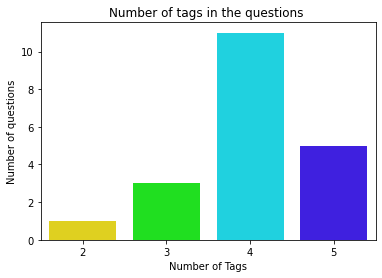

In [7]:

# import necessary packages
import matplotlib.pyplot as plt

sns.countplot(tags, palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

2. Determine the Total Number of Unique Tags

In [8]:
print(tags)
print(tagshort2)

[5, 4, 3, 5, 5, 2, 4, 3, 4, 4, 4, 3, 5, 4, 4, 4, 4, 5, 4, 4]
[['c#', 'floating-point', 'type-conversion', 'double', 'decimal'], ['html', 'css', 'css3', 'internet-explorer-7'], ['c#', '.net', 'datetime'], ['c#', 'datetime', 'time', 'datediff', 'relative-time-span'], ['javascript', 'html', 'browser', 'timezone', 'timezoneoffset'], ['.net', 'math'], ['mysql', 'database', 'binary-data', 'data-storage'], ['mysql', 'database', 'triggers'], ['sql', 'sql-server', 'datatable', 'rdbms'], ['php', 'plugins', 'architecture', 'hook'], ['html', 'form-submit', 'html-form', 'submit-button'], ['c#', 'linq', '.net-3.5'], ['linux', 'winapi', 'visual-c++', 'unix', 'timer'], ['svn', 'tortoisesvn', 'branch', 'branching-and-merging'], ['.net', 'performance', 'memory-leaks', 'com-interop'], ['java', 'xml', 'csv', 'data-conversion'], ['java', 'php', 'oop', 'theory'], ['mysql', 'sql-server', 'csv', 'sql-server-2005', 'bcp'], ['sql-server', 'database', 'svn', 'version-control'], ['algorithm', 'language-agnostic',

In [9]:
l = []

for k in range(len(tagshort2)):
  for i in tagshort2[k]:
    l.append(i)

In [10]:
# initializing the list
random_list = l
frequency = {}

# iterating over the list
for item in random_list:
   # checking the element in dictionary
   if item in frequency:
      # incrementing the counr
      frequency[item] += 1
   else:
      # initializing the count
      frequency[item] = 1

# printing the frequency
print(frequency)

{'c#': 4, 'floating-point': 1, 'type-conversion': 1, 'double': 1, 'decimal': 1, 'html': 3, 'css': 1, 'css3': 1, 'internet-explorer-7': 1, '.net': 3, 'datetime': 2, 'time': 1, 'datediff': 1, 'relative-time-span': 1, 'javascript': 1, 'browser': 1, 'timezone': 1, 'timezoneoffset': 1, 'math': 1, 'mysql': 3, 'database': 3, 'binary-data': 1, 'data-storage': 1, 'triggers': 1, 'sql': 1, 'sql-server': 3, 'datatable': 1, 'rdbms': 1, 'php': 2, 'plugins': 1, 'architecture': 1, 'hook': 1, 'form-submit': 1, 'html-form': 1, 'submit-button': 1, 'linq': 1, '.net-3.5': 1, 'linux': 1, 'winapi': 1, 'visual-c++': 1, 'unix': 1, 'timer': 1, 'svn': 2, 'tortoisesvn': 1, 'branch': 1, 'branching-and-merging': 1, 'performance': 1, 'memory-leaks': 1, 'com-interop': 1, 'java': 2, 'xml': 1, 'csv': 2, 'data-conversion': 1, 'oop': 1, 'theory': 1, 'sql-server-2005': 1, 'bcp': 1, 'version-control': 1, 'algorithm': 1, 'language-agnostic': 1, 'colors': 1, 'color-space': 1}


In [11]:
number_of_unique_tags = len(set(l))
number_of_unique_tags

62

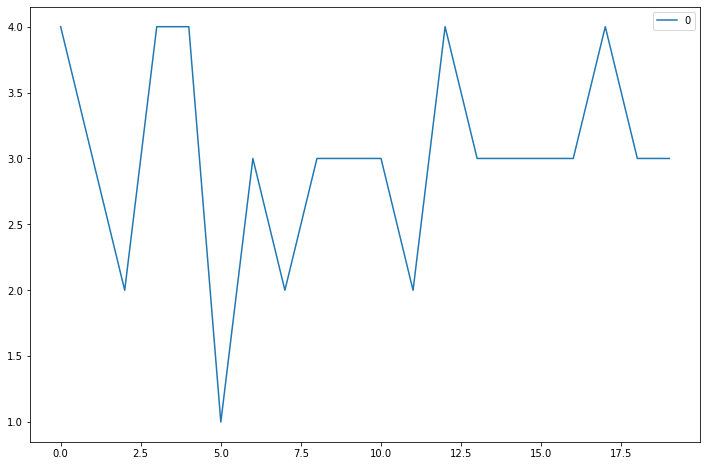

In [ ]:
data = pd.DataFrame(l)
data.plot(figsize=(12,8))

Q 3 Determine the top-25 Tags appearing frequently

In [16]:
import collections
k = collections.Counter(frequency)
#k = Counter(frequency)
 
# Finding 3 highest values
high = k.most_common(25)
 
 
 
print("top-25 Tags appearing frequently:")
print("Keys: Values")
 
for i in high:
    print(i[0]," :",i[1]," ")


top-25 Tags appearing frequently:
Keys: Values
c#  : 4  
html  : 3  
.net  : 3  
mysql  : 3  
database  : 3  
sql-server  : 3  
datetime  : 2  
php  : 2  
svn  : 2  
java  : 2  
csv  : 2  
floating-point  : 1  
type-conversion  : 1  
double  : 1  
decimal  : 1  
css  : 1  
css3  : 1  
internet-explorer-7  : 1  
time  : 1  
datediff  : 1  
relative-time-span  : 1  
javascript  : 1  
browser  : 1  
timezone  : 1  
timezoneoffset  : 1  


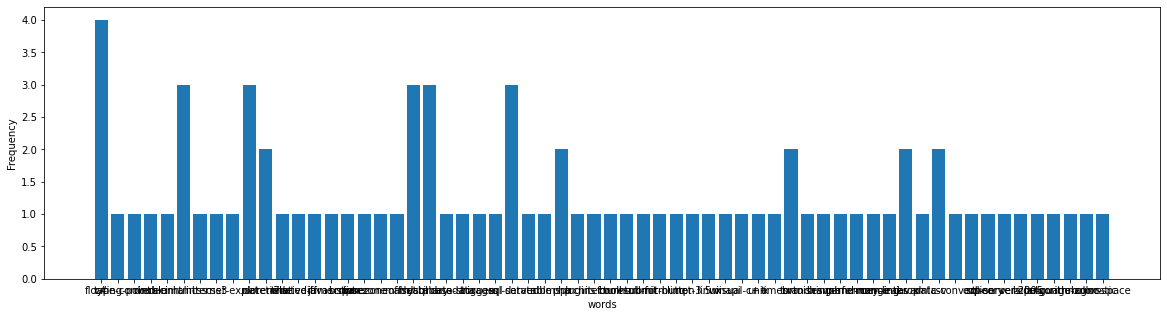

In [17]:

keys = frequency.keys()
values = frequency.values()

plt.bar(keys, values)
plt.rcParams["figure.figsize"] = (20, 5)
plt.xlabel("words")
plt.ylabel("Frequency")
plt.show()

4. Determine the nature of the distribution of top-500 tags

In [18]:
data_short = pd.read_csv('/content/drive/MyDrive/Machine learning/LHC dataset/Arjun_Assignment_data/dataset/posts_short.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [19]:
type(data_short)

pandas.core.frame.DataFrame

In [20]:
data_short.shape

(676204, 14)

In [21]:
data_short.describe()

,Unnamed: 0,id,post_type_id,accepted_answer_id,parent_id,score,view_count,owner_user_id,answer_count,comment_count,favorite_count
count,676204.000000,6.762040e+05,676204.0,6.762040e+05,676204.0,676204.000000,6.762040e+05,6.762040e+05,676204.000000,676204.000000,676204.000000
mean,338101.500000,2.584291e+07,1.0,1.166794e+07,-999.0,14.731906,1.549030e+04,2.891993e+06,2.415215,2.547613,5.042214
std,195203.425051,1.586292e+07,0.0,1.531875e+07,0.0,97.924320,7.056748e+04,2.703980e+06,3.403235,2.914937,44.758421
min,0.000000,4.000000e+00,1.0,-9.990000e+02,-999.0,-146.000000,3.000000e+00,-9.990000e+02,0.000000,0.000000,0.000000
25%,169050.750000,1.170959e+07,1.0,-9.990000e+02,-999.0,0.000000,6.400000e+01,6.399082e+05,1.000000,0.000000,0.000000
50%,338101.500000,2.566376e+07,1.0,2.574750e+06,-999.0,1.000000,4.880000e+02,1.952811e+06,2.000000,2.000000,0.000000
75%,507152.250000,3.999613e+07,1.0,2.095320e+07,-999.0,5.000000,5.694000e+03,4.648680e+06,3.000000,4.000000,1.000000
max,676203.000000,5.213412e+07,1.0,5.213268e+07,-999.0,21775.000000,6.842435e+06,1.030524e+07,518.000000,70.000000,9977.000000


In [22]:
data_short= pd.DataFrame(data_short)
col = list(data_short.columns.values)
print(col)

['Unnamed: 0', 'id', 'post_type_id', 'accepted_answer_id', 'parent_id', 'creation_date', 'score', 'view_count', 'owner_user_id', 'tags', 'answer_count', 'comment_count', 'favorite_count', 'community_owned_date']


In [23]:
from pandas._libs.algos import take_1d_int16_int64
tar_count={}
for i in data_short['tags']:
  try:
    mylist=i.split('>')
  except:
    continue
  mylist.pop()
  for j in mylist:
    if j[1:] in tar_count:
      tar_count[j[1:]] +=1
    else:
      tar_count[j[1:]]=1

In [ ]:
print(tar_count)

In [ ]:
sort_order = sorted(tar_count.items(), key= lambda x: x[1], reverse=True)
print(sort_order)
x=[i for i in range(1,501)]
print(x)

In [ ]:
top_500=dict()
c=0
for i,j in sort_order:
  if c==500:
    break
  top_500[i]=j
  c+=1
print(top_500)
print(len(top_500))

In [ ]:
x=[i for i in range(1,501)]
print(x)
y= list()
for i,j in top_500.items():
  y.append(j)
print(y)

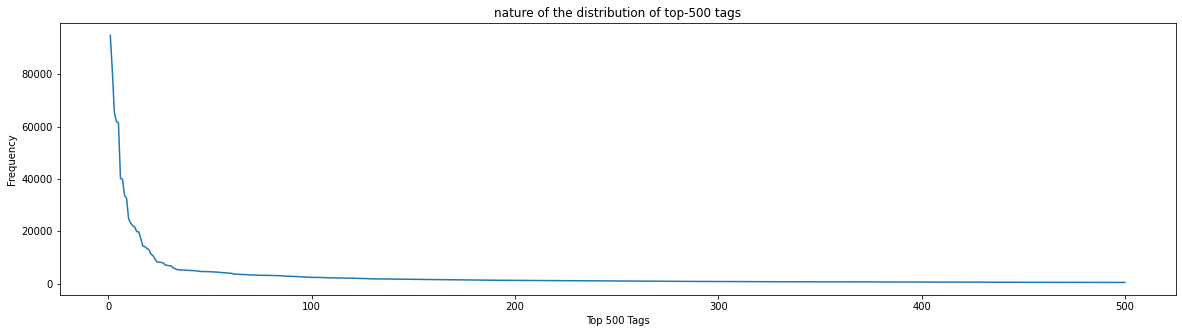

In [28]:
plt.plot(x,y)
plt.xlabel('Top 500 Tags')
plt.ylabel('Frequency')
plt.title("nature of the distribution of top-500 tags")
plt.show()

5. Determine the ratio of duplicate questions asked in each month

In [34]:
df_train= pd.read_csv('/content/drive/MyDrive/Machine learning/LHC dataset/Arjun_Assignment_data/dataset/postLinks.csv')

In [35]:
df_train

,Unnamed: 0,id,creation_date,post_id,related_post_id,link_type_id
0,0,19,2010-04-26T02:59:48.130,109,32412,1
1,1,37,2010-04-26T02:59:48.600,1970,617600,1
2,2,42,2010-04-26T02:59:48.647,2154,2451138,1
3,3,48,2010-04-26T02:59:48.740,2483,496096,1
4,4,52,2010-04-26T02:59:48.757,2572,209329,1
...,...,...,...,...,...,...
5292619,5292619,1624278139,2018-09-02T08:09:41.520,52133002,31486547,1
5292620,5292620,1624278147,2018-09-02T08:10:50.820,52134991,5500805,1
5292621,5292621,1624278315,2018-09-02T08:14:26.470,52135049,30461565,1
5292622,5292622,1624278337,2018-09-02T08:15:36.387,52135007,1761051,1


In [37]:
df_train['new']=df_train["creation_date"].str.split("-").str.get(0)+"-"+df_train["creation_date"].str.split("-").str.get(1)
z = df_train['new'].value_counts()
z

2013-02    111122
2017-03     81405
2018-03     80077
2017-08     78681
2016-03     77796
            ...  
2010-09     12160
2010-11     11271
2010-06      9970
2010-05      9694
2018-09      1616
Name: new, Length: 102, dtype: int64

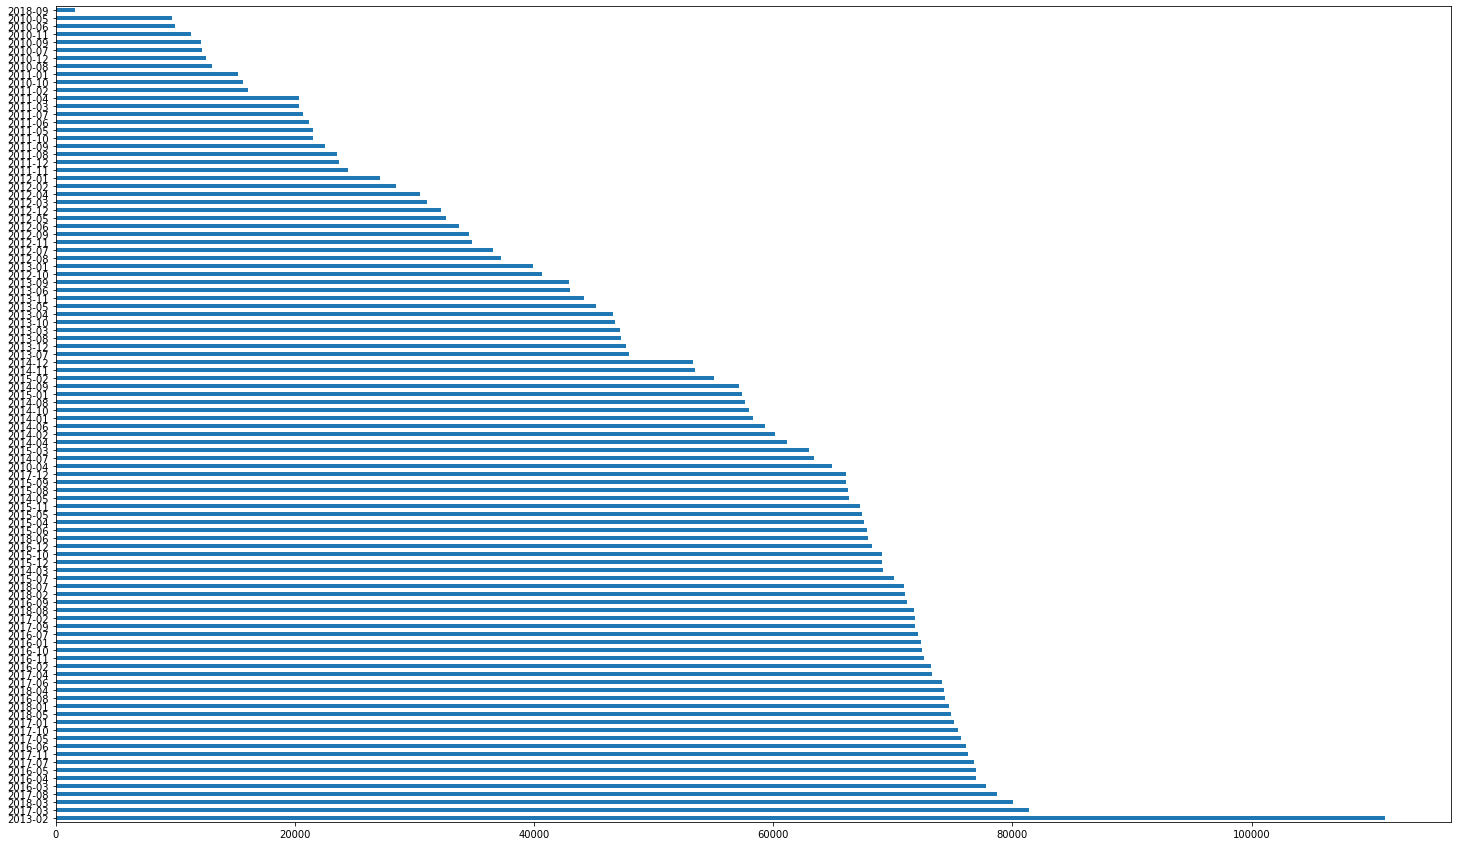

In [38]:
plt.figure(figsize=(25, 15))
z.plot.barh()

In [39]:
df_train['link_type_id'] = df_train['link_type_id'].astype('int')

In [143]:
date = df_train['creation_date']
#print(dates)
date_format = [pd.to_datetime(d) for d in date]
print(date_format)
df_train['date'] = date

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [144]:
date_time = [date_format[d].strftime("%m-%Y") for d in range(len(df_train))]
df_train['date_time'] = date_time
df_train["date_time"] = df_train["date_time"].astype('string')

In [145]:
l = []
for k in range(len(df_train)):
  if(df_train['link_type_id'][k] == 3):
    l.append(df_train['date_time'][k])

In [146]:
from collections import Counter
input_value = l
c = Counter( input_value )

print( c.items() )

dict_items([('02-2013', 75344), ('03-2013', 5579), ('04-2013', 4895), ('05-2013', 4620), ('06-2013', 4434), ('07-2013', 4424), ('08-2013', 4402), ('09-2013', 3467), ('10-2013', 3533), ('11-2013', 3170), ('12-2013', 4651), ('01-2014', 4101), ('02-2014', 5519), ('03-2014', 10816), ('04-2014', 6365), ('05-2014', 9403), ('06-2014', 7586), ('07-2014', 7348), ('08-2014', 6287), ('09-2014', 6688), ('10-2014', 6461), ('11-2014', 5490), ('12-2014', 6264), ('01-2015', 6305), ('02-2015', 5485), ('03-2015', 6643), ('04-2015', 7741), ('05-2015', 7996), ('06-2015', 7928), ('07-2015', 7677), ('08-2015', 7964), ('09-2015', 8306), ('10-2015', 8805), ('11-2015', 9064), ('12-2015', 9700), ('01-2016', 9350), ('02-2016', 9846), ('03-2016', 10477), ('04-2016', 11112), ('05-2016', 10860), ('06-2016', 11502), ('07-2016', 10314), ('08-2016', 10482), ('09-2016', 10492), ('10-2016', 11095), ('11-2016', 10895), ('12-2016', 10034), ('01-2017', 11170), ('02-2017', 10790), ('03-2017', 12666), ('04-2017', 11470), ('0

In [147]:
di = dict(c)
#mylist=tags
x = [i for i in range(len(di))]
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]


In [148]:
y = list()
for i,j in di.items():
  y.append(j)
print(y)

[75344, 5579, 4895, 4620, 4434, 4424, 4402, 3467, 3533, 3170, 4651, 4101, 5519, 10816, 6365, 9403, 7586, 7348, 6287, 6688, 6461, 5490, 6264, 6305, 5485, 6643, 7741, 7996, 7928, 7677, 7964, 8306, 8805, 9064, 9700, 9350, 9846, 10477, 11112, 10860, 11502, 10314, 10482, 10492, 11095, 10895, 10034, 11170, 10790, 12666, 11470, 11601, 12079, 12540, 13441, 12946, 14116, 15055, 12511, 14569, 13868, 15366, 14017, 13830, 12378, 13401, 13301, 294]


In [149]:
lables_of_tags = list()
for i,j in di.items():
  lables_of_tags.append(i)
print(lables_of_tags) 

['02-2013', '03-2013', '04-2013', '05-2013', '06-2013', '07-2013', '08-2013', '09-2013', '10-2013', '11-2013', '12-2013', '01-2014', '02-2014', '03-2014', '04-2014', '05-2014', '06-2014', '07-2014', '08-2014', '09-2014', '10-2014', '11-2014', '12-2014', '01-2015', '02-2015', '03-2015', '04-2015', '05-2015', '06-2015', '07-2015', '08-2015', '09-2015', '10-2015', '11-2015', '12-2015', '01-2016', '02-2016', '03-2016', '04-2016', '05-2016', '06-2016', '07-2016', '08-2016', '09-2016', '10-2016', '11-2016', '12-2016', '01-2017', '02-2017', '03-2017', '04-2017', '05-2017', '06-2017', '07-2017', '08-2017', '09-2017', '10-2017', '11-2017', '12-2017', '01-2018', '02-2018', '03-2018', '04-2018', '05-2018', '06-2018', '07-2018', '08-2018', '09-2018']


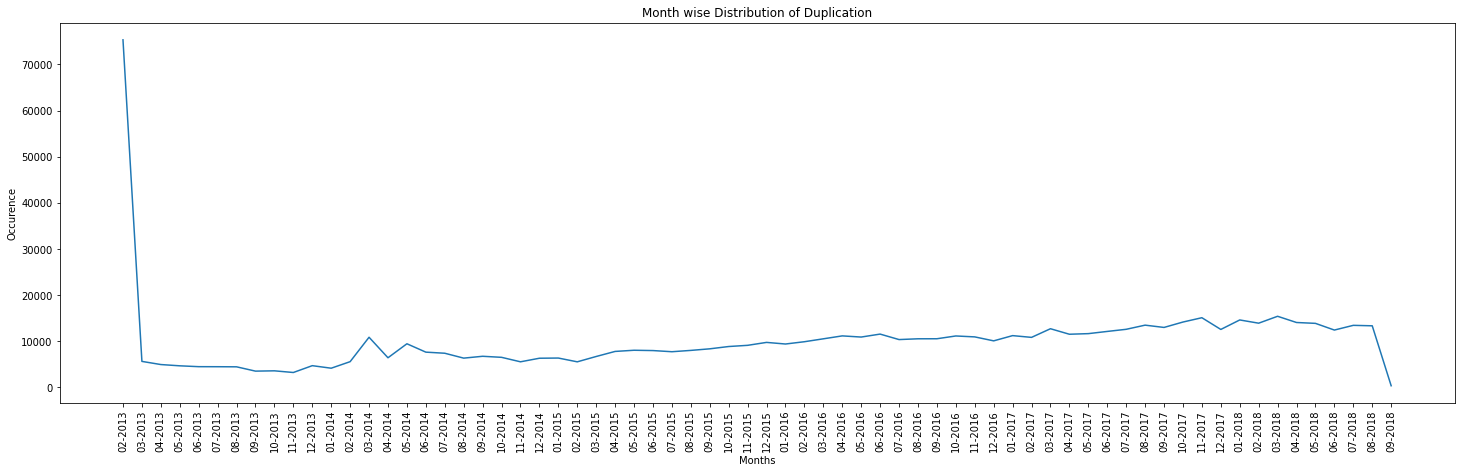

In [150]:
plt.figure(figsize=(25, 7))
plt.plot(x,y)
plt.xlabel("Months")
plt.ylabel("Occurence")
plt.title("Month wise Distribution of Duplication")

plt.xticks(x, lables_of_tags, rotation ='vertical')

plt.show()

In [151]:
n1 = y[0]
n2 = y[1]
ratio = dict()
def ratioFunction(n1, n2):
    int(n1) # this does nothing because you don't capture it
    int(n2) # also this
    ratio12 = int(n1/n2)
    return ratio12

ratioFunction(n1, n2)

13

In [152]:
ratios= []
for i in range(len(y)-1):
  n1 = y[i]
  n2 = y[i+1]
  a = ratioFunction(n1,n2)
  ratios.append(a)
print(ratios)

[13, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 45]


In [156]:
x = [i for i in range(len(di)-1)]
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]


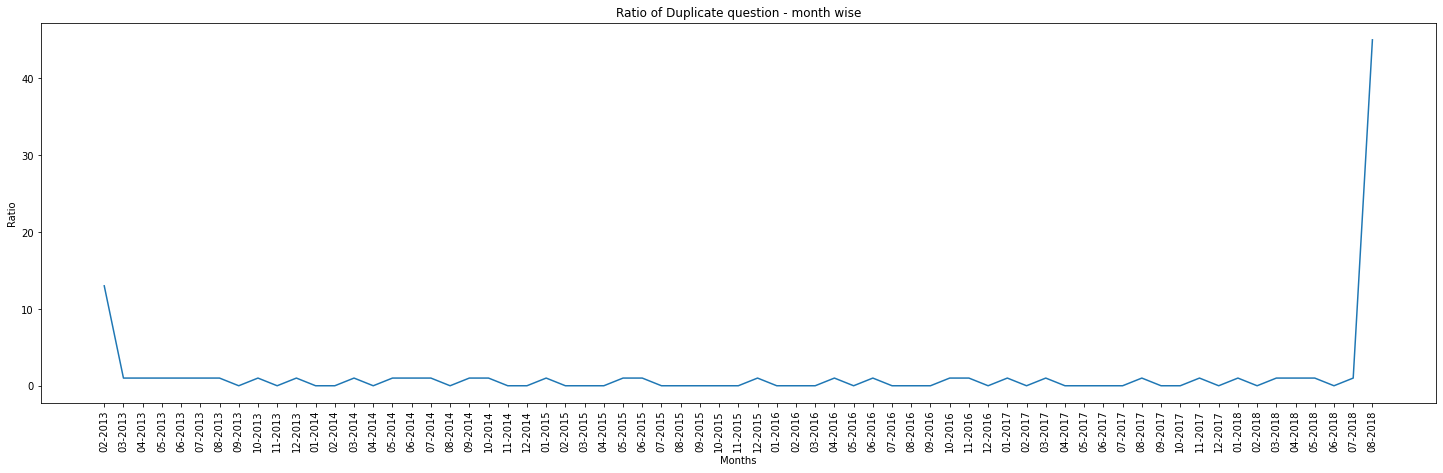

In [158]:
plt.figure(figsize=(25, 7))
plt.plot(x,ratios)
plt.xlabel("Months")
plt.ylabel("Ratio")
plt.title("Ratio of Duplicate question - month wise")

plt.xticks(x, lables_of_tags, rotation ='vertical')

plt.show()

Determine the percentage of duplicate questions associated with different tags
Each Stack Overflow question has some tags associated with it which is an
identification of the topic of the question content. For each tag in your dataset,
determine the number of duplicate questions associated with the tag over the total
number of questions (calculate the percentage). Determine the top-20 tags based on
the previously calculated numbers and then show the percentage in a bar chart.

In [160]:
data_long= pd.read_csv('/content/drive/MyDrive/Machine learning/LHC dataset/Arjun_Assignment_data/dataset/posts_long.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [162]:
date = data_long['creation_date']
#print(dates)
date_format = [pd.to_datetime(di) for di in date]
print(date_format)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [164]:
date_time = [date_format[di].strftime("%m-%Y") for di in range(len(data_long))]

In [165]:
data_long['date_time'] = date_time

In [166]:
dataf4 = pd.DataFrame()
dataf5 = pd.DataFrame()

In [167]:
dataf4['id'] = pd.DataFrame(df_train['post_id'])

In [168]:
dataf4['link_type_id'] = df_train['link_type_id']

In [169]:
dataf5= pd.DataFrame(data_long['id'])
dataf5['tags'] = data_long['tags']

In [170]:
dataf6 = pd.merge(dataf4,dataf5,on="id")
dataf6

,id,link_type_id,tags
0,2483,1,<c#><.net>
1,2483,3,<c#><.net>
2,3859,1,<version-control>
3,3859,1,<version-control>
4,6173,1,<.net><html><regex>
...,...,...,...
1076089,52133674,3,<java><firebase><android-studio>
1076090,52132801,1,<ansible><f5>
1076091,52132801,3,<ansible><f5>
1076092,52011078,1,<c#><httpwebrequest><webbrowser-control>


In [171]:
j = []
for i in dataf5['tags']:
  j.append(i.split(">"))
  #j.append(x)

In [172]:
tags = []

for k in range(len(dataf5)):
	for i in j[k]:
  		tags.append(i)

In [ ]:
[x for x in tags if x]

In [ ]:
unique_tags = []
for x in tags:
    if x not in unique_tags:
        unique_tags.append(x)
print(unique_tags)

In [ ]:
from collections import Counter
input_value = tags
c1 = Counter( input_value )

print( c1.items() )

In [176]:
d1 = dict(c1)
d1.pop("")

676204

In [177]:
l = []
for k in range(len(dataf6)):
  if(df_train['link_type_id'][k] == 3):
    l.append(dataf6['tags'][k])

In [178]:
j1 = []
for i in l:
  j1.append(i.split(">"))
  #j.append(x)

In [179]:
tags1 = []

for k in range(len(j1)):
	for i in j1[k]:
  		tags1.append(i)

In [ ]:
[x for x in tags1 if x]

In [ ]:

from collections import Counter
input_value = tags1
c = Counter( input_value )

print( c.items() )

In [182]:
d = dict(c)
d.pop("")

87874

In [188]:
duplicate = pd.DataFrame([d])
real_values = pd.DataFrame([d1])

In [189]:
duplicate

,<python,<java,<swing,<javascript,<momentjs,<bookmarklet,<bash,<ubuntu,<bash-on-windows,<multithreading,...,<end-to-end,<output-clause,<prestodb,<qubole,<amazon-elastic-beanstalk,<xregexp,<prometheus-net,<dos,<supplier,<stringstream
0,11681,12305,427,11903,45,2,1628,155,2,597,...,1,1,2,2,1,2,1,2,1,1


In [190]:
real_values

,<c#,<floating-point,<type-conversion,<double,<decimal,<html,<css,<css3,<internet-explorer-7,<.net,...,<3d-printing,<read-the-docs,<ant-media-server,<bucket-sort,<mirc,<codeanywhere,<iis-express-10,<prometheus-net,<supplier,<f5
0,61899,1628,759,924,577,33736,23161,4629,92,14290,...,1,1,1,1,1,1,1,1,1,1


In [191]:
real_values = real_values.melt( 
        var_name="Tags", 
        value_name="Value")


In [192]:
duplicate = duplicate.melt( 
        var_name="Tags", 
        value_name="Value")

In [193]:
real_values

,Tags,Value
0,<c#,61899
1,<floating-point,1628
2,<type-conversion,759
3,<double,924
4,<decimal,577
...,...,...
25305,<codeanywhere,1
25306,<iis-express-10,1
25307,<prometheus-net,1
25308,<supplier,1


In [194]:
df1 = pd.DataFrame()

In [195]:
df1 = pd.merge(real_values,duplicate,on="Tags")
df1

,Tags,Value_x,Value_y
0,<c#,61899,7023
1,<floating-point,1628,184
2,<type-conversion,759,125
3,<double,924,96
4,<decimal,577,73
...,...,...,...
8352,<asp.net-core-hosted-services,1,1
8353,<ml.net,1,1
8354,<ant-media-server,1,1
8355,<prometheus-net,1,1


In [196]:
n1 = df1['Value_x'][0]
n2 = df1['Value_y'][0]

In [197]:
def percentage(n1,n2):
  quotient = n1 / n2

  percent = quotient * 100
  print(percent)
  return(percent)

percentage(n2,n1)

11.345902195512043


11.345902195512043

In [198]:
df11 = df1

In [ ]:
percentages = []
for i in range(len(df11)):
  n1 = df11['Value_x'][i]
  n2 = df11['Value_y'][i]
  a = percentage(n2,n1)
  percentages.append(a)
print(percentages)

In [202]:
df11['percentage'] = percentages

In [203]:
df11

,Tags,Value_x,Value_y,percentage
0,<c#,61899,7023,11.345902
1,<floating-point,1628,184,11.302211
2,<type-conversion,759,125,16.469038
3,<double,924,96,10.389610
4,<decimal,577,73,12.651646
...,...,...,...,...
8352,<asp.net-core-hosted-services,1,1,100.000000
8353,<ml.net,1,1,100.000000
8354,<ant-media-server,1,1,100.000000
8355,<prometheus-net,1,1,100.000000


In [ ]:
x = [i for i in range(len(df11))]
print(x)

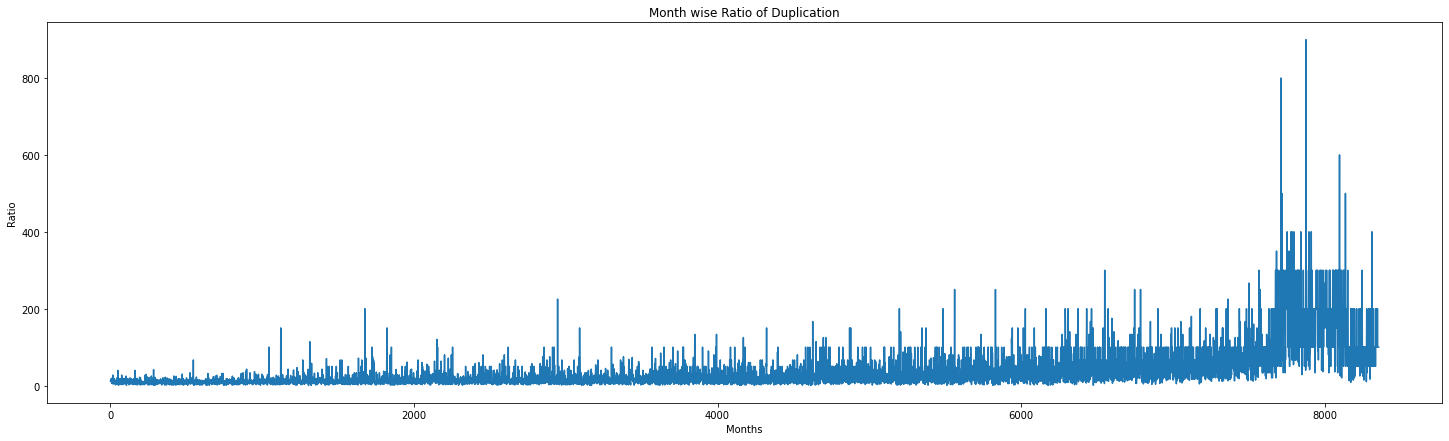

In [205]:
plt.figure(figsize=(25, 7))
plt.plot(x,percentages)
plt.xlabel("Months")
plt.ylabel("Ratio")
plt.title("Month wise Ratio of Duplication")

#plt.xticks(x, lables_of_tags, rotation ='vertical')

plt.show()

In [ ]:
from collections import Counter
input_value = tags1
c = Counter( input_value )

print( c.items() )

In [207]:
d = dict(c)

In [208]:
import operator
sorted_d = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))

In [209]:
sorted_d.pop("")

87874

In [227]:
top20 = {}
count1 = 0
for a,b in sorted_d.items():
  if count1==20:
    break;
  top20[a] = b
  count1 += 1
print(top20)
print(len(top20))

{'<java': 12305, '<javascript': 11903, '<python': 11681, '<php': 8163, '<c#': 7023, '<android': 5290, '<html': 4999, '<c++': 3665, '<mysql': 3434, '<jquery': 3378, '<css': 3358, '<r': 3330, '<arrays': 3191, '<c': 2784, '<python-3.x': 2487, '<regex': 2283, '<swift': 1967, '<json': 1950, '<sql': 1873, '<ios': 1741}
20


In [226]:
top20_data = pd.DataFrame([top20])

In [212]:
top20_data

,<java,<javascript,<python,<php,<c#,<android,<html,<c++,<mysql,<jquery,<css,<r,<arrays,<c,<python-3.x,<regex,<swift,<json,<sql,<ios
0,12305,11903,11681,8163,7023,5290,4999,3665,3434,3378,3358,3330,3191,2784,2487,2283,1967,1950,1873,1741


In [213]:
top20_data = top20_data.melt( 
        var_name="Tags", 
        value_name="Value")


In [214]:
top20_data

,Tags,Value
0,<java,12305
1,<javascript,11903
2,<python,11681
3,<php,8163
4,<c#,7023
5,<android,5290
6,<html,4999
7,<c++,3665
8,<mysql,3434
9,<jquery,3378


In [225]:
df_percent = pd.merge(top20_data,df11,on="Tags")
df_percent


,Tags,Value,Value_x,Value_y,percentage
0,<java,12305,94846,12305,12.973663
1,<javascript,11903,81346,11903,14.632557
2,<python,11681,61505,11681,18.991952
3,<php,8163,65333,8163,12.494452
4,<c#,7023,61899,7023,11.345902
5,<android,5290,39910,5290,13.254823
6,<html,4999,33736,4999,14.817999
7,<c++,3665,40158,3665,9.126451
8,<mysql,3434,24765,3434,13.866344
9,<jquery,3378,32601,3378,10.361645


In [216]:
x = [i for i in range(len(df_percent))]
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [217]:
duplicated_percentage = []
for i in range(len(df_percent)):
  duplicated_percentage.append(df_percent['percentage'][i])

In [218]:
duplicated_percentage

[12.973662568795733,
 14.632557224694514,
 18.991951873831393,
 12.494451502303583,
 11.345902195512043,
 13.254823352543221,
 14.817998577187574,
 9.126450520444246,
 13.866343630123158,
 10.361645348302199,
 14.498510427010924,
 16.86588330632091,
 16.061811043438865,
 12.559776233871695,
 31.5289046653144,
 16.18345502232934,
 17.56720550147361,
 18.21578701541336,
 10.8724676380101,
 8.066533846082564]

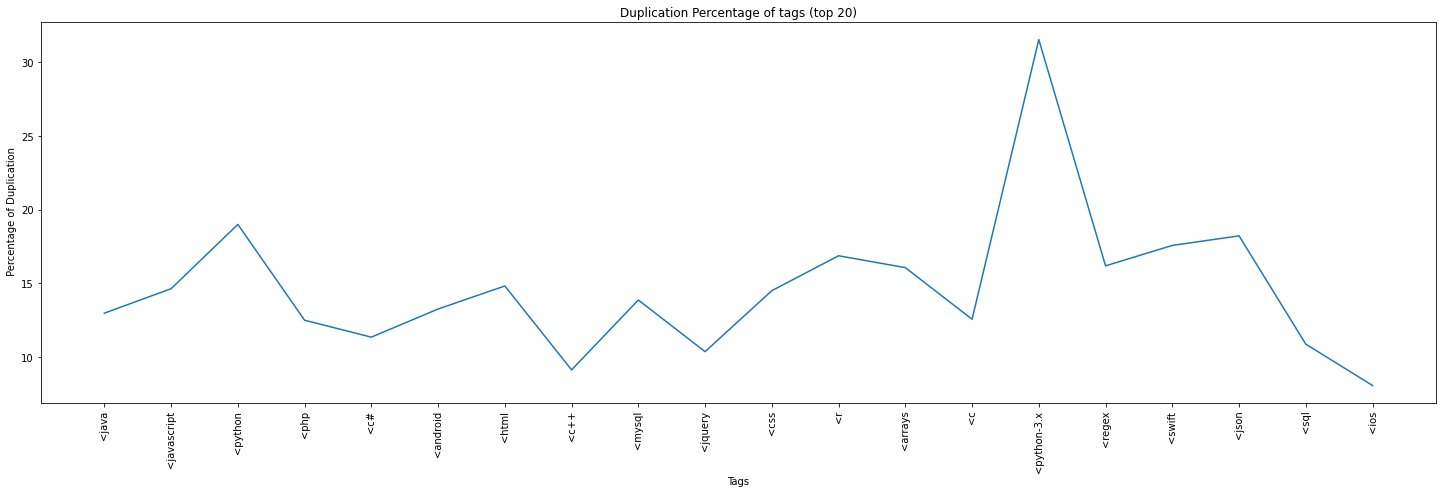

In [223]:
plt.figure(figsize=(25, 7))
plt.plot(x,duplicated_percentage)
plt.xlabel("Tags")
plt.ylabel(" Percentage of Duplication")
plt.title("Duplication Percentage of tags (top 20)")

lables_of_tags = df_percent['Tags']
plt.xticks(x, lables_of_tags, rotation ='vertical')

plt.show()

In [220]:
lables_of_tags = df_percent['Tags']


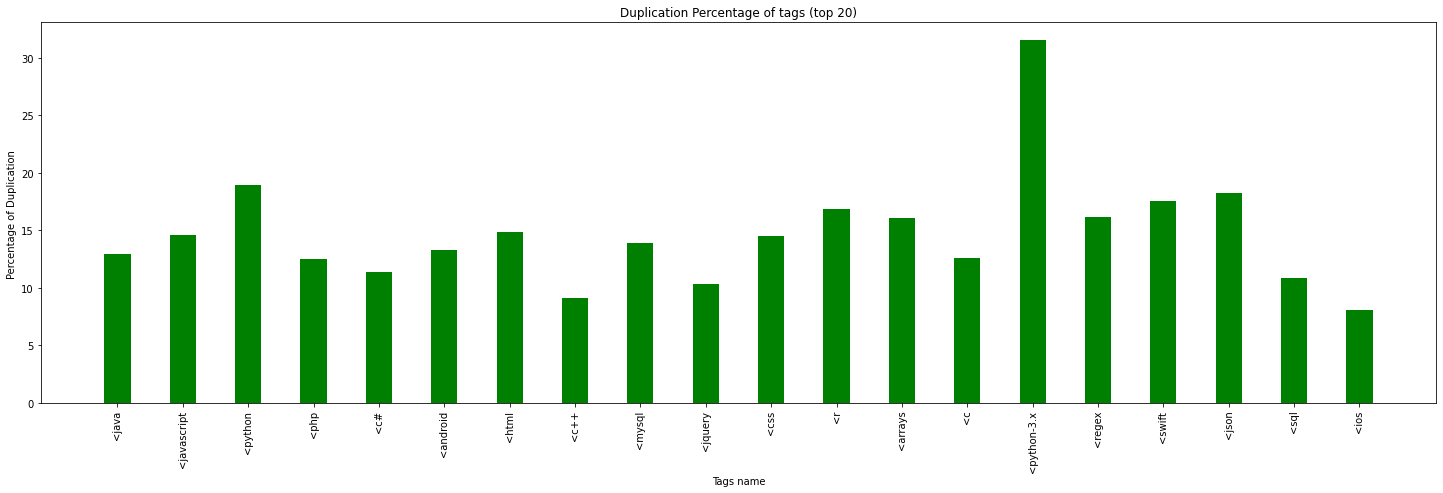

In [224]:
plt.figure(figsize=(25, 7))
plt.bar(x, duplicated_percentage, color ='green',
        width = 0.4)
plt.xlabel("Tags name")
plt.ylabel("Percentage of Duplication ")
plt.title("Duplication Percentage of tags (top 20)")
plt.xticks(x, lables_of_tags, rotation ='vertical')
plt.show()